In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.hipify.hipify_python import value

In [6]:
data = pd.read_csv('CVPR_REBUTTAL_EXPERIMENTS.csv')

In [7]:
data

,SETTING,MODEL,RECALL,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,24,25,26
0,NO CORRUPTIONS,DSGDETR,R@10,0.349032,0.402970,0.253787,0.000000,0.765778,0.620000,0.620992,...,0.533019,0.644938,0.479215,0.757229,0.943470,0.580024,0.0,0.863975,0.000000,0.000000
1,NO CORRUPTIONS,DSGDETR,R@20,0.635442,0.693025,0.603246,0.099206,0.802022,0.675127,0.697317,...,0.643681,0.689808,0.621358,0.797753,0.952539,0.684391,0.0,0.901492,0.000000,0.000000
2,NO CORRUPTIONS,DSGDETR,R@50,0.696619,0.738633,0.727493,0.321712,0.844156,0.693031,0.785468,...,0.725217,0.710158,0.800505,0.832971,0.971282,0.729572,0.5,0.915972,0.385366,0.067227
3,NO CORRUPTIONS,DSGDETR,R@100,0.697610,0.740658,0.728117,0.621835,0.852788,0.693920,0.798876,...,0.731956,0.711468,0.825806,0.838476,0.975665,0.732268,0.5,0.915972,0.585366,0.487395
4,NO CORRUPTIONS,DSGDETR + IMPARTAIL,R@10,0.232995,0.281555,0.263474,0.423328,0.782828,0.511026,0.511108,...,0.584382,0.599485,0.632916,0.776737,0.937727,0.524280,0.0,0.888328,0.000000,0.231092
5,NO CORRUPTIONS,DSGDETR + IMPARTAIL,R@20,0.562066,0.651215,0.581709,0.517479,0.806234,0.613514,0.618137,...,0.648323,0.666710,0.679536,0.806917,0.958283,0.641456,0.0,0.910268,0.000000,0.558824
6,NO CORRUPTIONS,DSGDETR + IMPARTAIL,R@50,0.692065,0.742727,0.729252,0.586971,0.839843,0.686002,0.755948,...,0.704927,0.704508,0.777972,0.833894,0.966898,0.719201,0.5,0.916630,0.414634,0.647059
7,NO CORRUPTIONS,DSGDETR + IMPARTAIL,R@100,0.695769,0.747245,0.732906,0.613331,0.856972,0.696953,0.807530,...,0.713836,0.711637,0.821727,0.844601,0.974002,0.729459,0.5,0.916630,0.565854,0.647059
8,NO CORRUPTIONS,STTRAN,R@10,0.018822,0.049806,0.032023,0.016723,0.545823,0.487261,0.164707,...,0.096137,0.494105,0.591443,0.634313,0.230502,0.408418,0.0,0.646117,0.004878,0.000000
9,NO CORRUPTIONS,STTRAN,R@20,0.171058,0.256110,0.224185,0.134921,0.704650,0.546580,0.418076,...,0.313567,0.568235,0.688714,0.742338,0.594317,0.536493,0.0,0.761957,0.073171,0.000000


In [11]:
settings_models = data.groupby(['SETTING', 'MODEL']).size().reset_index()[['SETTING', 'MODEL']]
settings_models

,SETTING,MODEL
0,CORRUPTIONS,DSGDETR
1,CORRUPTIONS,DSGDETR + IMPARTAIL
2,CORRUPTIONS,STTRAN
3,CORRUPTIONS,STTRAN + IMPARTAIL
4,NO CORRUPTIONS,DSGDETR
5,NO CORRUPTIONS,DSGDETR + IMPARTAIL
6,NO CORRUPTIONS,STTRAN
7,NO CORRUPTIONS,STTRAN + IMPARTAIL


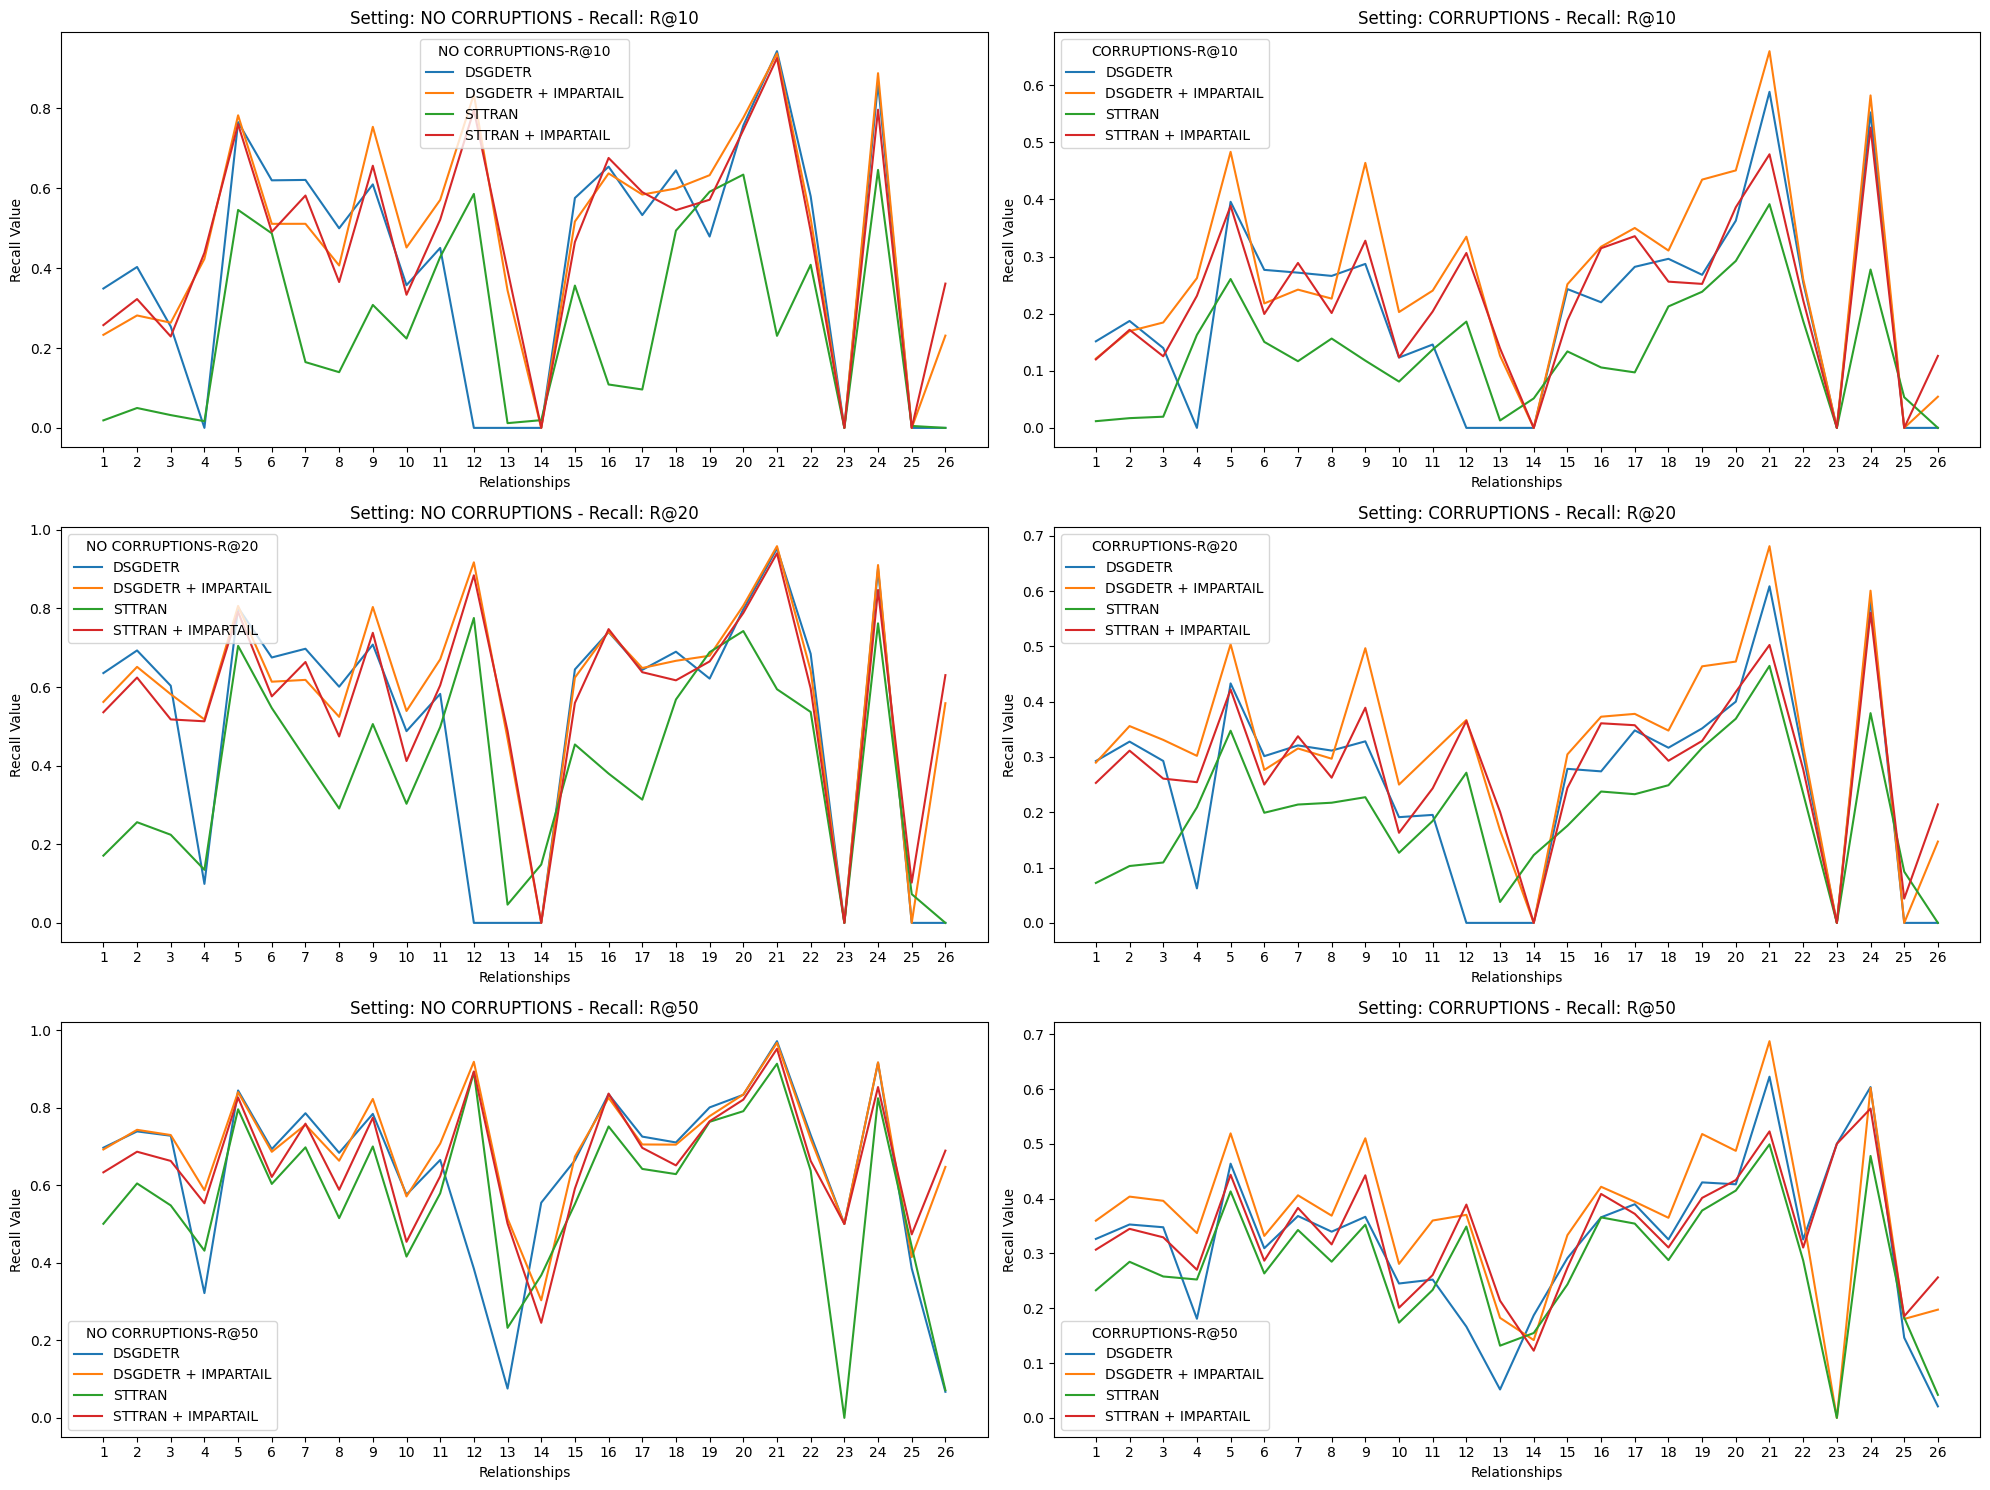

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

row_counter = -1
column_counter = -1
for setting in ["NO CORRUPTIONS", "CORRUPTIONS"]:
	column_counter += 1
	row_counter = -1
	setting_data = data[data['SETTING'] == setting]
	for recall in ["R@10", "R@20", "R@50"]:
		row_counter += 1
		ax = axes[row_counter, column_counter]
		recall_data = setting_data[setting_data['RECALL'] == recall]
		# Plot the data corresponding to each model to compare the results in columns named 1-26 together and store the plot
		value_columns = setting_data.columns[3:29]
		for i in range(len(recall_data)):
			ax.plot(value_columns, recall_data.iloc[i, 3:29], label=recall_data.iloc[i, 1])
		ax.set_title(f'Setting: {setting} - Recall: {recall}')
		ax.set_xlabel('Relationships')
		ax.set_ylabel('Recall Value')
		ax.legend(title=f"{setting}-{recall}")	
		
fig.tight_layout()

# Save the figure
plt.savefig('recall_comparison.png')

plt.show()